In [64]:
#Importing packages needed
import scipy
from scipy import stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime
from numpy import absolute, sqrt, log
from textwrap import wrap
from IPython.display import Math, display
import sys
%matplotlib inline

**95% Confidence interval function:**

In [32]:
def checkcorr(data,confidence=0.95):
    a = 1 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

**Important function:**

In [26]:
def c1(a,b,c):
    s = 0
    ss = 0
    for i in range(len(a)):
        s = s + b[i]*c[i]
        ss = ss + (b[i]**2)
    D = s - len(a)*np.nanmean(b)*np.nanmean(c)
    E = ss - len(a)*np.nanmean(b)**2
    F = D/E
    G = np.nanmean(c) - np.nanmean(b)*F
    return(G,F)

**Question 2: Quality of Dummy Weather Forecast**

In [76]:
#Define a function to calculate rxy
def Rxy(a,b,c):
    d = 0
    e = 0
    f = 0
    bmean = np.nanmean(b)
    cmean = np.nanmean(c)
    for n in range(len(a)):
        d = d + ((b[n] - bmean)*(c[n]-cmean))
        e = e + ((b[n]-bmean)**2)
        f = f + ((c[n]-cmean)**2)
        n = n + 1
    rxy = d/(np.sqrt(e*f))
    return(rxy)

**Question 3: Comparison of Confidence Intervals for Minute-Resolution and Hour-Resolution Data**

In [3]:
#Fix the timestamp in Python
offset = datetime(1970, 1, 1).toordinal() + 366
good_timestamp = pd.to_datetime(719529 - offset, unit='D')

#Import data
dat1 = pd.read_csv("UVicSci_temperature_2019.dat",header=2)
dat2 = pd.read_csv("AllStations_temperature_h_2019.dat",header=1)

#Obtain the required data
#Minute
dates = pd.date_range(start='2013-12-31 17:00:00.000000',end='2019-08-30 16:59:00.000000',freq='min')
dat1.insert(loc=0,column='Time',value=len(dates))
dat1a = dat1.rename(index=str,columns={"1973788": "Temperature"})
datm = dat1a.set_index('Time')
#Hour
dat2a = dat2.rename(index=str,columns={"Temperature"})
columns = dat2a.columns.tolist()
columns = columns[-1:]+columns[:-1]
dat2b = dat2a[cols]
dath = dat2b.set_index('Time')

NameError: name 'datetime' is not defined

In [ ]:
#Range of data required
dath7 = dath.loc['2017-07-01 00:00:00':'2017-07-01 23:59']
dath8 = dath.loc['2018-07-01 00:00:00':'2018-07-01 23:59']
datm7 = datm.loc['2017-07-01 00:00:00':'2018-07-01 23:59']
datm8 = datm.loc['2018-07-01 00:00:00':'2018-07-01 23:59']

#Plot
dath7['Temperature'].plot(label='Temperature (Hours)',=color'red')
datm7['Temperature'].plot(label='Temperature (Minutes)',color='blue')
plt.title('Temperature from 2017-07-01')
plt.ylabel('Temp')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.show()

dath8['Temperature'].plot(label='Temperature (Hours)',=color'red')
datm8['Temperature'].plot(label='Temperature (Minutes)',color='blue')
plt.title('Temperature from 2018-07-01')
plt.ylabel('Temp')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Calculating means for both sets
dath7_avg = np.nanmean(dath7['Temperature'])
datm7_avg = np.nanmean(datm7['Temperature'])
dath8_avg = np.nanmean(dath8['Temperature'])
datm8_avg = np.nanmean(datm8['Temperature'])
Print('Mean for 2017 hourly is:',dath7_avg)
Print('Mean for 2018 hourly is:',dath8_avg)
Print('Mean for 2017 minute is:',datm7_avg)
Print('Mean for 2018 minute is:',datm8_avg)

**Question 4: Linear Dependence of Wave Height and Wind Speed**

In [27]:
#Importing required data to answer question
windwave = pd.read_csv("WindWaveData.dat",header=None,delimiter=r"\s+")

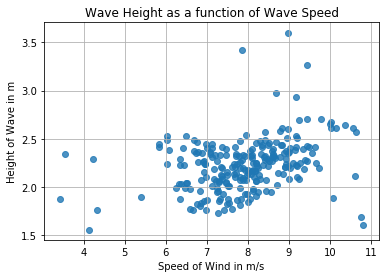

In [34]:
#Plotting wave height as a function of wind speed using seaborn package
x = windwave[0]
y = windwave[1]
sns.regplot(x,y,data=windwave,fit_reg=False)
plt.ylabel('Height of Wave in m')
plt.xlabel('Speed of Wind in m/s')
plt.title('Wave Height as a function of Wave Speed')
plt.grid()
plt.show()

One can see that as speed of wind increases, so does the height of wave. Therefore, data is linearly dependent as suspected.

In [75]:
#Calculating correlation coefficient, ruHs
windwavecorr = np.corrcoef(windwave[1],windwave[0])
print('Correlation coefficient, ruHs is:',windwavecorr)

#Linear correlation at 95% confidence
checkcorr(windwave,0.95)
print('The 95% confidence is:',checkcorr)

Correlation coefficient, ruHs is: [[1.         0.32235428]
 [0.32235428 1.        ]]
The 95% confidence is: <function checkcorr at 0x7f63d62f7b90>


We can see that there is no linear correlation with 95% confidence.

In [46]:
#Calculating linear regreesion line, Hs
#First use the function c1 that calculates regression line
x = np.linspace(2.5,12,2)
y = c1[0] + x*c1[1]
sns.regplot(x,y,data=windwave,fit_reg=False)
plt.xlabel('Speed of Wind in m/s')
plt.ylabel('Height of Wave in m')
plt.title('Height of Wave as a Function of Speed of Wind with Reg. Line')
plt.plot(x,y,label='Regression Line ($H_s$)',color='red')
plt.xlim(3,11)
plt.legend()
plt.grid()
plt.show()

#Printing the slope of plot
print('The slope is:',c1[1])

TypeError: 'function' object is not subscriptable

In [50]:
#Adding regression lines with uncertainties
#First define a bunch of functions for uncertainties
def epsilon(a,b,c):
    d = len(a)
    e = 0
    f = c1(a,b,c)
    for i in range(d):
        D = c[i] - c[0] - c[1]*b[i]
        e = e + (D**2)
    sepsilon = np.sqrt(e/d-2)
    return(epsilon)

def xx(a,b,c):
    d = len(a)
    e = 0
    for i in range(d):
        a = b[i] - np.nanmean(b)
        e = e + (a**2)
    xx = e/(d-1)
    return(xx)

def x2(a,b,c):
    x2 = np.sqrt(xx(a,b,c))
    return(x2)

def uncertainty(a,b,c,d):
    e = len(a)
    f = stats.t.ppf(1-(1-d)/2,e-1)
    g = np.sqrt(e-1)*xx(a,b,c)
    efg = epsilon(a,b,c) * (f/g)
    return(efg)

In [52]:
unc = uncertainty(windwave,windwave[0],windwave[1],0.95)
x = np.linspace(2.5,12,2)
l1 = c1[0] + x*c1[1]
l2 = c1[0] + x*(c1[1] + unc)
l3 = c1[0] + x*(c1[1] - unc)
x = windwave[0]
y = windwave[1]
sns.regplot(x,y,data=windwave, fit_reg=False)
plt.title('Height of Wave as a Function of Speed of Wind with multiple Reg. Lines and Uncertainties')
plt.xlabel('Speed of Wind in m/s')
plt.ylabel('Height of Wave in m')
plt.xlim(10,11)
plt.plot(x,l1,label='($H_s$)',color='red')
plt.plot(x,l2,label='+ Uncertainty',color='orange')
plt.plot(x,l3,label='- Uncertainty',color='green')
plt.legend()
plt.grid()
plt.show()

TypeError: unsupported operand type(s) for *: 'function' and 'float'

In [54]:
#95% confidence interval for the slope of the same plot
x = np.linspace(2.5,12,2)
l11 = c1[0] + x*c1[1]
l22 = a(windwave[0],windwave[1],c1[1]+unc) + x*(c1[1]+unc)
l33 = a(windwave[0],windwave[1],c1[1]-unc) + x*(c1[1]-unc)
x3 = windwave[0]
y3 = windwave[1]
sns.regplot(x3,y3,data=windwave,fit_reg=False)
plt.title('Previous plot with a 95% confidence interval')
plt.xlabel('Speed of Wind in m/s')
plt.ylabel('Height of Wave in m')
plt.plot(x,l11,label='($H_s$)',color='red')
plt.plot(x,l22,label='+ Uncertainty',color='orange')
plt.plot(x,l33,label='- Uncertainty',color='green')
plt.xlim(3,11)
plt.legend()
plt.grid()
plt.show()
print('+ve slope is:',c1[1]+unc,'and -ve slope is:',c1[1]-unc)

TypeError: 'function' object is not subscriptable